# Part I - ProsperLoan Dataset Exploration 
## by Iwuoha Joshua

## Introduction
> The dataset contains 11397 rows and 81 columns all with information on the loan details of each customer.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
df= pd.read_csv('/coprosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [ ]:
df.shape

(113937, 81)

In [4]:
#Extract columns to explore
df = df[['Term', 'LoanStatus','ProsperScore','EmploymentStatus','EmploymentStatusDuration','DebtToIncomeRatio', 'IncomeRange','MonthlyLoanPayment','LoanOriginalAmount','BorrowerAPR','StatedMonthlyIncome','LoanMonthsSinceOrigination']]

In [ ]:
print(df.shape)
print(df.dtypes)
print(df.describe())

(113937, 12)
Term                            int64
LoanStatus                     object
ProsperScore                  float64
EmploymentStatus               object
EmploymentStatusDuration      float64
DebtToIncomeRatio             float64
IncomeRange                    object
MonthlyLoanPayment            float64
LoanOriginalAmount              int64
BorrowerAPR                   float64
StatedMonthlyIncome           float64
LoanMonthsSinceOrigination      int64
dtype: object
                Term  ProsperScore  EmploymentStatusDuration  \
count  113937.000000  84853.000000             106312.000000   
mean       40.830248      5.950067                 96.071582   
std        10.436212      2.376501                 94.480605   
min        12.000000      1.000000                  0.000000   
25%        36.000000      4.000000                 26.000000   
50%        36.000000      6.000000                 67.000000   
75%        36.000000      8.000000                137.000000   
max  

In [ ]:
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

According to the data dictionary, the ProsperScore which is a custom risk score ranges from 1 - 10 with 10 being the best or lowest risk. But as can be seen here there is an 11 in the dataset. I am going to assume that this was a 1 mistakenly inputted as an 11. While exploring further, this might turn out to be a 10 mistakenly inputted as an 11. 

In [ ]:
#The ProsperScore in ordinal in nature and to avoid it being plotted as a regular number, I've assigned it the string data type. 
df.ProsperScore.replace('11.0','1.0',inplace = True)
df.ProsperScore = df.ProsperScore.apply(lambda x:'{}'.format(x))

In [6]:
#converting 'IncomeRange','ProsperScore' from a plain object tyoe into an ordered categorical type.
order = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not employed','Not displayed'],
         'ProsperScore':['1.0','2.0','3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0'],
         'LoanStatus':['Current','Completed','Chargedoff','Defaulted','Past Due (1-15 days)',
                       'Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)',
                       'Past Due (91-120 days)','FinalPaymentInProgress']}
         
                        
                        

for i in order:
    my_order = pd.api.types.CategoricalDtype(ordered = True, categories = order[i])
    df[i] = df[i].astype(my_order)

### What is the structure of your dataset?

> The dataset contains 11397 rows and 81 columns all with information on the loan details of each customer. 

### What is/are the main feature(s) of interest in your dataset?

> The LoanStatus, which shows whether or not the loan has be fully repaid, would be the main feature i'll be interested in as well as some of the factors i think will influence it,such as the MonthlyLoanPayment, the IncomeRange as well as StatedMonthlyIncome which is the range within which the borrower's income falls and the monthly income of the borrower respectively. The LoanOriginalAmount(The amount borrowed), is also of interest and factors that i think might influence it such as the prosperscore, incomerange, statedmonthlyincome, will be duly explored. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The StatedMonthlyIncome, incomerange, debttoincomeratio, i think, would have a big impact on an individual's ability to repay the loan.

## Univariate Exploration

> In this section, I investigate distributions of individual variables.

In [7]:
base_color = sb.color_palette()[0]

In [ ]:
#return an ordered list
def order(dataframe,x):
    return dataframe[x].value_counts().index

In [ ]:
def bins(low,high,space):
    return 10**np.arange(low,high+space,space)

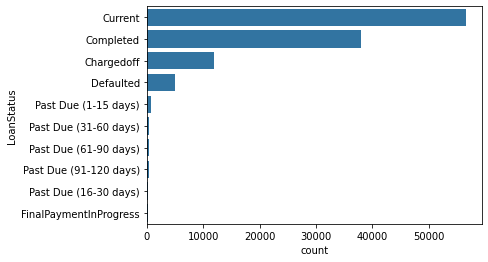

In [ ]:
sb.countplot(data = df, y = 'LoanStatus',color = base_color,order = order(df,'LoanStatus'));

The majority of the customers are still repaying their debt, few have defaulted and quite a lot have paid back completely. As for the rest of the categories, there are very few observations.

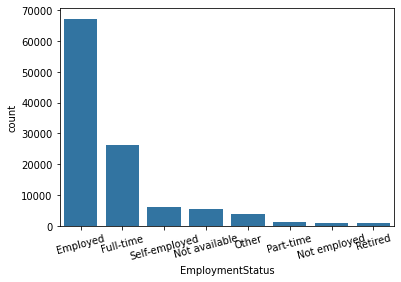

In [ ]:
sb.countplot(data = df, x = df.EmploymentStatus,color = base_color, order = order(df,'EmploymentStatus'))
plt.xticks(rotation = 15);

Apparently,loans were given to people that are unemployed,though they are quite a few. As expected those Employed in one form or the other make up a larger percent of the whole. 

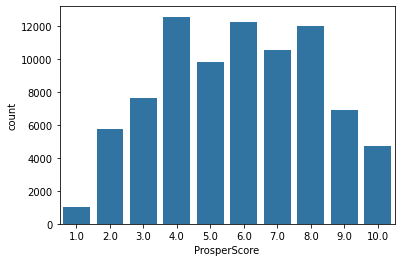

In [ ]:
sb.countplot(data = df,x = df.ProsperScore,color = base_color);

As expected, loan prospects with a ProsperScore of 1 are the fewest with 1 being the riskiest.Majority fall between 4 and 8.

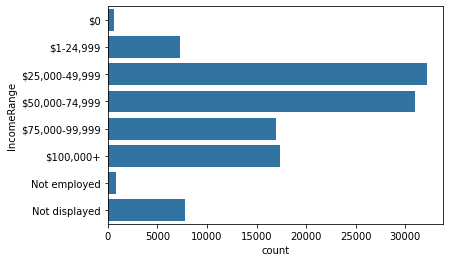

In [ ]:
sb.countplot(data = df, y = 'IncomeRange', color = base_color);

Most are in the $25000 - 49,999 range and $50,000 - 74,999 range. During Further exploration, we'll investigate how this affects how much loan they have access to as well as their ability to repay. 

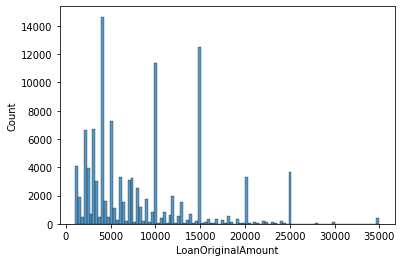

In [ ]:
sb.histplot(data = df, x = 'LoanOriginalAmount');

In [ ]:
ticks = [500,1000,2000,5000,10000,20000,50000]
label = ['{}'.format(v) for v in ticks]

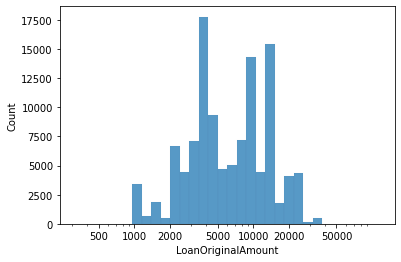

In [ ]:
sb.histplot(data = df, x = 'LoanOriginalAmount',bins = bins(2.5,5,0.08))
plt.xscale('log')
plt.xticks(ticks,label);

In [ ]:
ticks = [500,1000,2000,5000,10000,20000,50000]
label = ['{}'.format(v) for v in ticks]

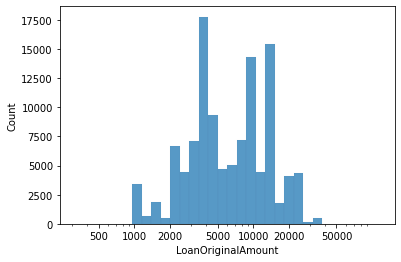

In [ ]:
sb.histplot(data = df, x = 'LoanOriginalAmount',bins = bins(2.5,5,0.08))
plt.xscale('log')
plt.xticks(ticks,label);

There are three peaks in the histogram,between the 3500 - 4000,9000 - 10000,and around 11,000 - 12,000,in the order in which they appear on the chart. These appear to be the loan amounts that're most frequently requested. 

In [ ]:
ticks = np.arange(0.1,1.2,0.1)
label = ['{:.1f}'.format(v) for v in ticks]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


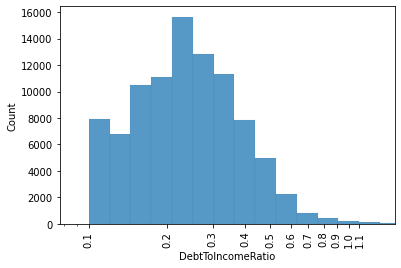

In [ ]:
sb.histplot(data = df, x =  'DebtToIncomeRatio',bins = bins(-1,1.2,0.08))
plt.xscale('log')
plt.xlim(0,1.5)
plt.xticks(ticks,label,rotation = 90);

The chart is unimodal with a peak between 0.2 - 0.3. The histogram followed the expected pattern as there are fewer loans for the higher debt-to-income ratios, as we see the drop in the chart from 0.4. A lower debt-to-income ratio means a stroger ability to payback the loan amount, and we can see that more customers with a strong income base in proprtion to the loan amount taken were given the loan. 

Let us see the monthly income  distribution in the dataset. 

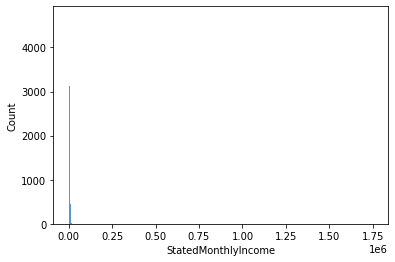

In [ ]:
sb.histplot(data = df, x = 'StatedMonthlyIncome');

Apparently there are outliers in the dataset and so the chart is not very informative. I'll try to transform the scale into a log scale to see if we can tweak it into a better format. 

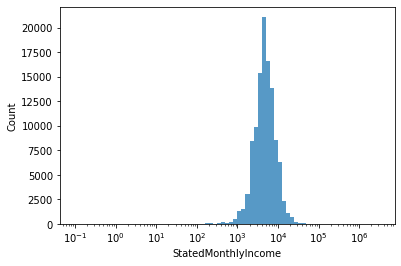

In [ ]:
sb.histplot(data = df, x = 'StatedMonthlyIncome',bins = bins(-1,6.5,0.1))
plt.xscale('log');

Changing the scale and bin size did prove helpful but the the outliers to the left are still a problem. 

In [ ]:
low = df[df.StatedMonthlyIncome < 100]

Term                          1759
LoanStatus                    1757
ProsperScore                   781
EmploymentStatus              1720
EmploymentStatusDuration      1633
DebtToIncomeRatio              326
IncomeRange                   1759
MonthlyLoanPayment            1759
LoanOriginalAmount            1759
BorrowerAPR                   1759
StatedMonthlyIncome           1759
LoanMonthsSinceOrigination    1759
dtype: int64
        Term  LoanStatus ProsperScore EmploymentStatus  \
78        36  Chargedoff          NaN        Full-time   
100       36  Chargedoff          3.0     Not employed   
108       36   Completed          NaN        Full-time   
125       36     Current          5.0     Not employed   
146       36   Completed          NaN              NaN   
...      ...         ...          ...              ...   
113686    36   Completed          NaN        Full-time   
113761    60     Current          8.0     Not employed   
113766    36     Current          8.0     Not

There are unrealistic monthly income amounts in the data set(0.0833...) and so i'll just exclude them.

In [ ]:
#Extract just the realistic amounts using an estumate from the chart.
new_df = df.query('StatedMonthlyIncome > 100')

In [ ]:
ticks = [200,500,1000,2000,5000,10000,20000,50000,100000]
label = ['{}'.format(v) for v in ticks]

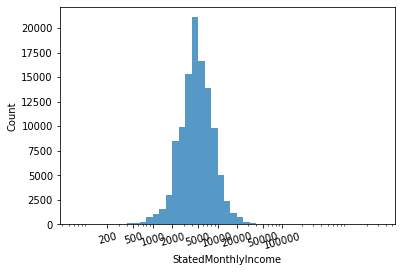

In [ ]:
sb.histplot(data = new_df, x = 'StatedMonthlyIncome',bins = bins(1.8,6.5,0.1))
plt.xscale('log')
plt.xticks(ticks,label,rotation = 15);

From the histogram, we can the distribution is unimodal with the pesk for monthly income earners between 4000- 5000, majority earn between 2000 -10000,then there is a progressive downward slope till it fizzles out at around 35000. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> The distribution for the monthly income is unimodal with the peak for monthly income earners between 4000- 5000, majority earn between 2000 - 10000. The initial histogram plot wasn't informative and so i have had to tweak it by transforming the scale to a log scale as well as filter out unrealistic amounts that were outliers . For the loanoriginalamount, the distribution showed three peaks which i presume to be loan amounts that weee most frequently requested.I have also had to transfrom it to a log scale to get a more interpretable chart. More observations fell within the 25000−49,999 𝑟𝑎𝑛𝑔𝑒 𝑎𝑛𝑑 50,000 - 74,999 range for the income range. As expected, loan prospects with a ProsperScore of 1 are the fewest with 1 being the riskiest.Majority fall between 4 and 8.The chart for the DebtToIncomeRatio is unimodal with a peak between 0.2 - 0.3. The histogram followed the expected pattern as there are fewer loans for the higher debt-to-income ratios, as we see the drop in the chart from 0.4. A lower debt-to-income ratio means a stroger ability to payback the loan amount, and we can see that more customers with a strong income base in proprtion to the loan amount taken were given the loan. The only oddity observed is that a few unemployed people were given loans.


## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in my dataset.

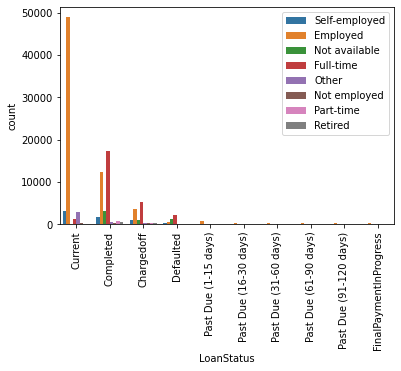

In [ ]:
sb.countplot(data = df, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right');

In [ ]:
g = df.groupby('EmploymentStatus')['LoanStatus'].value_counts()
g = g.reset_index(name = 'count').rename(columns = {'level_1':'LoanStatus'})
g = g.pivot(index = 'EmploymentStatus',columns = 'LoanStatus',values = 'count')

h = df.groupby('EmploymentStatus')['LoanStatus'].value_counts(normalize = True)*100
h = h.reset_index(name = 'percent').rename(columns = {'level_1':'LoanStatus'})
h = h.pivot(index = 'EmploymentStatus',columns = 'LoanStatus',values = 'percent')

In [ ]:
g = g.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]
                       
                       

h = h.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]

There isn't a lot of observations in these rows(Past Due (1-15 days), Past Due (61-90 days),Past Due (16-30 days),FinalPaymentInProgress, Past Due (31-60 days)), and they end up distracting from the main message in the heatmap. I'll exclude them for all heatmaps created.

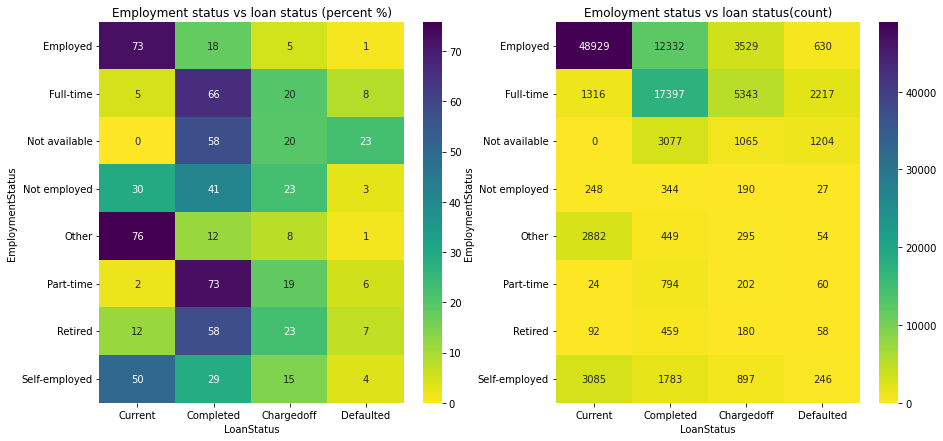

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Employment status vs loan status (percent %)')
sb.heatmap(h,annot = True, cmap = 'viridis_r',fmt = '.0f')

plt.subplot(1,2,2)
plt.title('Emoloyment status vs loan status(count)')
sb.heatmap(g,annot = True, cmap = 'viridis_r',fmt = '.0f')

Those unemployed and retired have the highest percentage of loans charged off,( loans that have been delinquent on loan payments for several months, that the creditor has given up on collecting the money owed and has decided to categorize the debt as bad debt) this doesn't come as a surprise. Those whose Employment status was not available had the highest rate of defaults on loan payments as well as a high rate of chargedoff loans,which could mean that they were unemployed and refused to disclose their current status. A larger precent of those employed in one form or the other were able to repay their debt, and even though some had a more than expected chargedoff rate, the percent of completed loans covers.

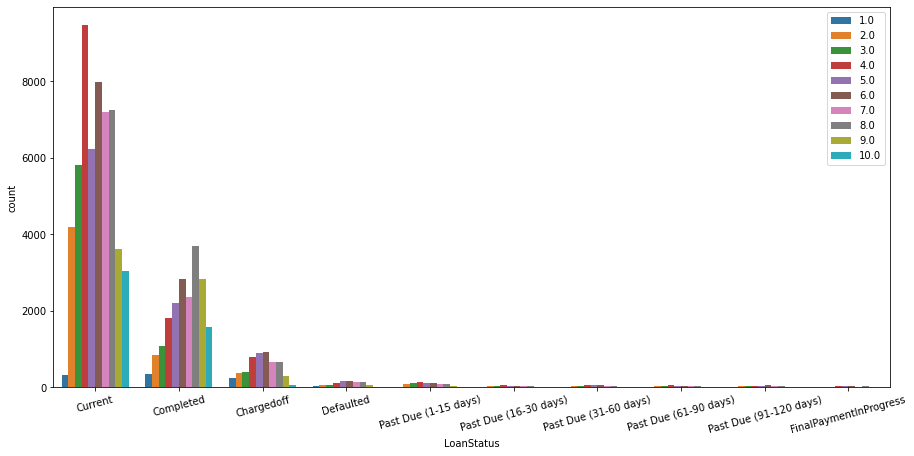

In [ ]:
plt.figure(figsize =(15,7))
sb.countplot(data = df, x = 'LoanStatus',hue= 'ProsperScore')
plt.xticks(rotation = 15)
plt.legend(loc = 'upper right');

In [ ]:
g = df.groupby('ProsperScore')['LoanStatus'].value_counts()
g = g.reset_index(name = 'count').rename(columns = {'level_1':'LoanStatus'})
g = g.pivot(index = 'ProsperScore',columns = 'LoanStatus',values = 'count')

In [ ]:
h = df.groupby('ProsperScore')['LoanStatus'].value_counts(normalize = True)*100
h = h.reset_index(name = 'percent').rename(columns = {'level_1':'LoanStatus'})
h = h.pivot(index = 'ProsperScore',columns = 'LoanStatus',values = 'percent')

In [ ]:
g = g.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]
                       
                       

h = h.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]

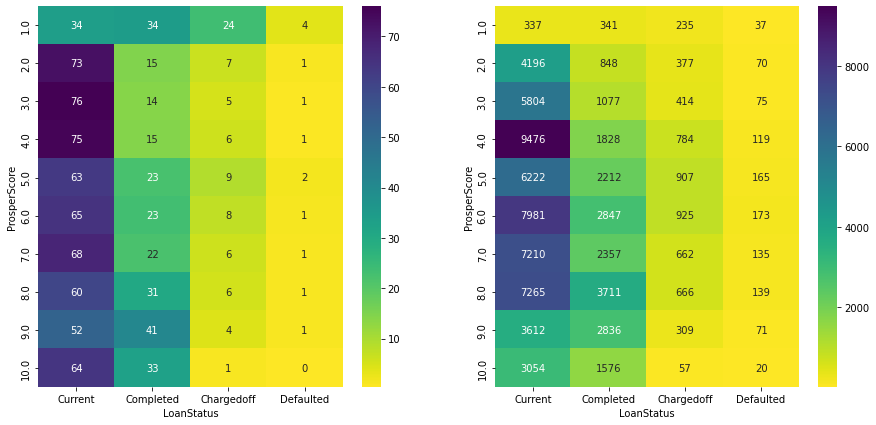

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sb.heatmap(h,annot = True, cmap = 'viridis_r',fmt = '.0f')

plt.subplot(1,2,2)
sb.heatmap(g,annot = True, cmap = 'viridis_r',fmt = '.0f')

The heatmap on the left shows the percentage value for each section. For the completed loan payments,the is a steady increase in the percentage of people that have paid off their debt as we move down the prosperScore. And although 34% of loan prospects with a ProsperScore of 1 hvae repaid the loan amount, it is offset by the 24% that have been chargedoff, which also as expected,is the highest percent for chargedofff loans. The other heatmap on the right, shows the count for each section
 

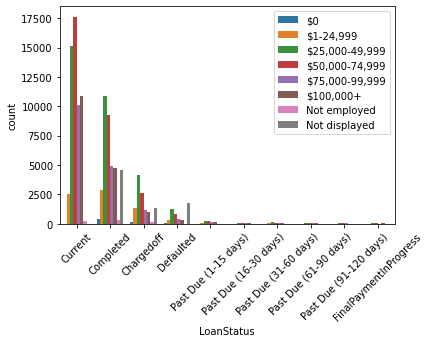

In [ ]:
sb.countplot(data = df, x ='LoanStatus',hue = 'IncomeRange')
plt.xticks(rotation = 45)
plt.legend(loc ='upper right');

Interpreting this would be biased as discovered from the univariate exploration, there are more observations in the $25,000 - 49,999 and $50,000 - 74,999 ranges. 

In [ ]:
g = df.groupby('IncomeRange')['LoanStatus'].value_counts()
g = g.reset_index(name = 'count').rename(columns = {'level_1':'LoanStatus'})
g = g.pivot(index = 'IncomeRange',columns = 'LoanStatus',values = 'count')

h = df.groupby('IncomeRange')['LoanStatus'].value_counts(normalize = True)*100
h = h.reset_index(name = 'percent').rename(columns = {'level_1':'LoanStatus'})
h = h.pivot(index = 'IncomeRange',columns = 'LoanStatus',values = 'percent')

In [ ]:
g = g.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]
                       
                       

h = h.loc[:,['Current', 'Completed', 'Chargedoff', 'Defaulted']]

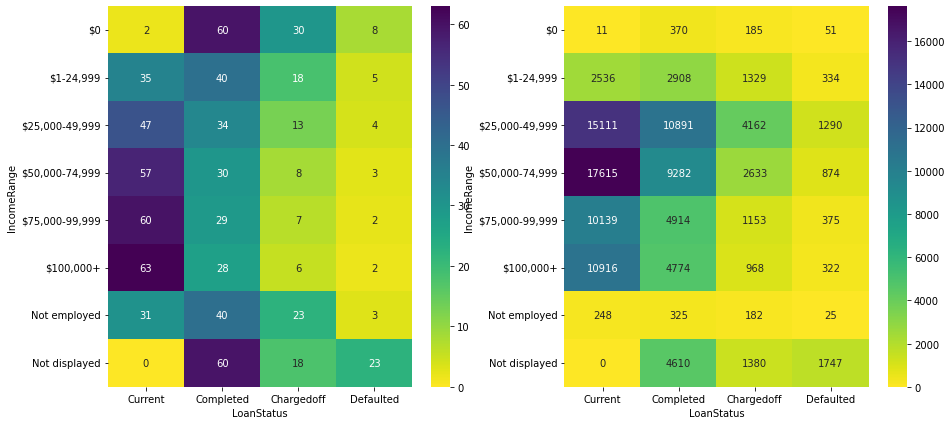

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sb.heatmap(h,annot = True, cmap = 'viridis_r',fmt = '.0f')

plt.subplot(1,2,2)
sb.heatmap(g,annot = True, cmap = 'viridis_r',fmt = '.0f')

From the chart on the left, we note that those whose income range were __not displayed__ had the highest ratebof chargedoff and defaulted loans, which shows that a customer's failure to indicate their income range could be a sign that they might not be able to repay or would default on payments. Also to note is that those who declared a zero dollar income might have difficulties repaying as can be deduced from the 30% and 8% chargedoff and defaulted rate respectively. Those unemployed also raise a cause for concern.

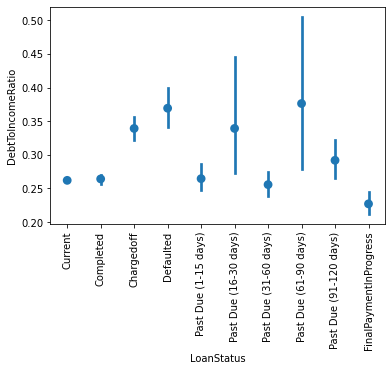

In [ ]:
sb.pointplot(data = df, x = 'LoanStatus',y = 'DebtToIncomeRatio',linestyles = '')
plt.xticks(rotation = 90);

A spotlight on the Defaulted and chargedoff variable, and we can see that it confirms the pattern observed in the univariate exploration of the DebtToIncomeRatio where we observed that there where a lesser count of loans given to customers with a hight debt to income ratio. Here we observe that the average debtbto income ratio for those who defaulted or whose loans were chargedoff were the highest. The average for those who have repaid or are about to make final payment on their loan is far less, indicating that the debttoincomeratio variable is a strong indicator of whether or not a customer will default on a loan.

In [ ]:
ticks = [200,500,1000,2000,5000,10000,20000,50000,100000]
label = ['{}'.format(i) for i in ticks]

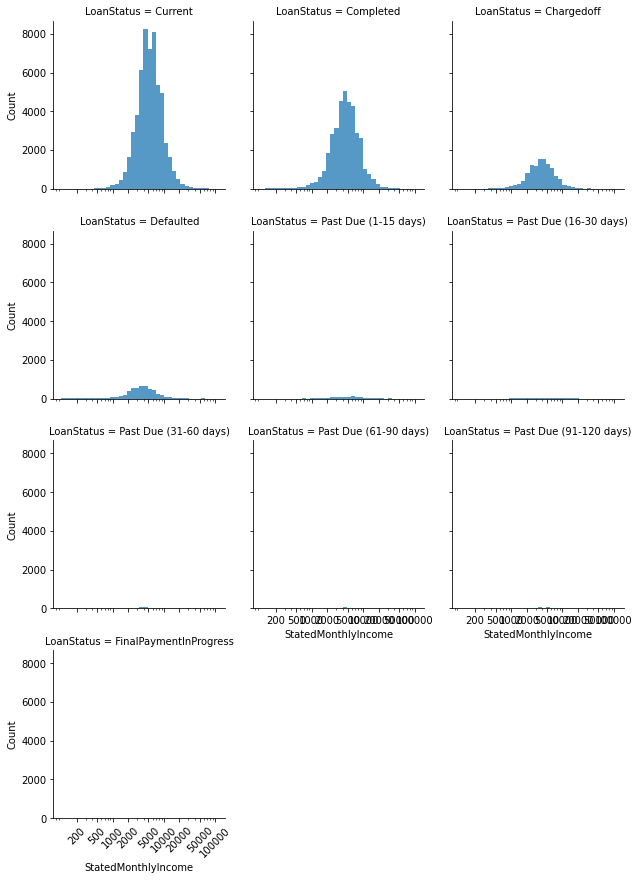

In [ ]:
g = sb.FacetGrid(data = df, col = 'LoanStatus',col_wrap = 3)
g.map(sb.histplot,'StatedMonthlyIncome',bins = bins(2,5,0.08))
plt.xscale('log')
plt.xticks(ticks, label,rotation = 45);

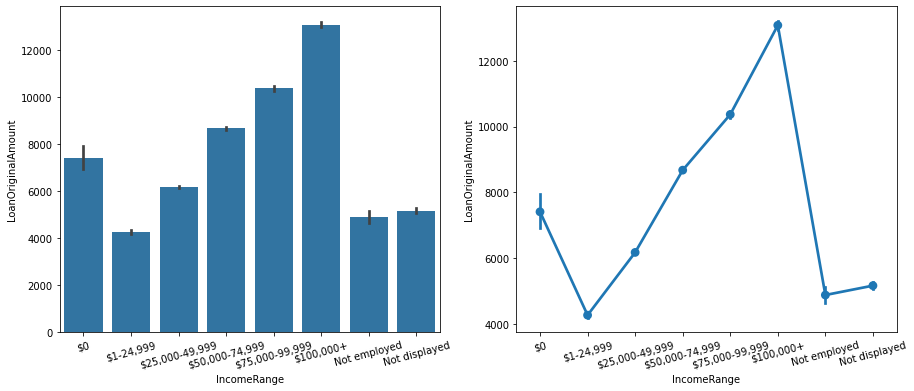

In [9]:
fig = plt.figure(figsize = (15,6))

plt.subplot(1,2,1)

sb.barplot(data = df, x = 'IncomeRange',y = 'LoanOriginalAmount',color = base_color);
plt.xticks(rotation = 15)

plt.subplot(1,2,2)
sb.pointplot(data = df, x = 'IncomeRange',y = 'LoanOriginalAmount')
plt.xticks(rotation = 15);

There is an inconsistency in the data as the mean loan amount for borrowers that declared a $0 income is surprisingly as high as 7000. Other than that, the pattern for the other categories follow the expected intuition that the mean loan amount would rise as the income bracket gets higher and fall for those that are not employed as they are less likely to repay the loan. Interesting to note is the fact that those who did not indicate their income range had access to a relatively low loan amount.

#### Further explore the $0 income range.

In [ ]:
zero_dol = df.query('IncomeRange == "$0"')

In [ ]:
man = zero_dol.EmploymentStatus.value_counts()

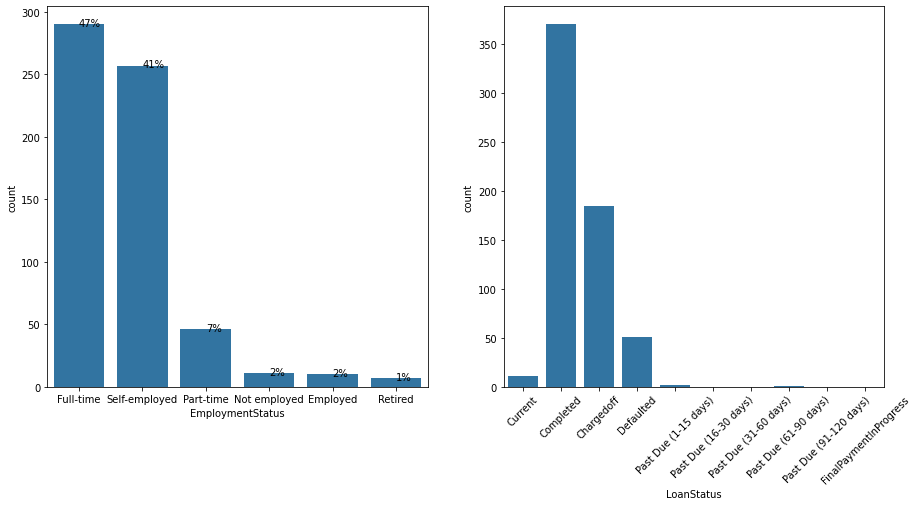

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sb.countplot(data = zero_dol, x= 'EmploymentStatus',order = man.index,color = base_color)
for i in range(man.shape[0]):
    count = man[i]
    pct_string = '{:.0f}%'.format((man[i]/zero_dol.shape[0])*100)
    plt.text(i,count+1,pct_string,va = 'center')

plt.subplot(1,2,2)
sb.countplot(data = zero_dol, x = 'LoanStatus',color = base_color)
plt.xticks(rotation = 45);

As seen from the countplot, more than 80% of those who declared a 0 dollar income range are in some form of employment and so many have repaid their debt. It must be that they did not fill that information in and the default value was shown i.e 0 dollars.

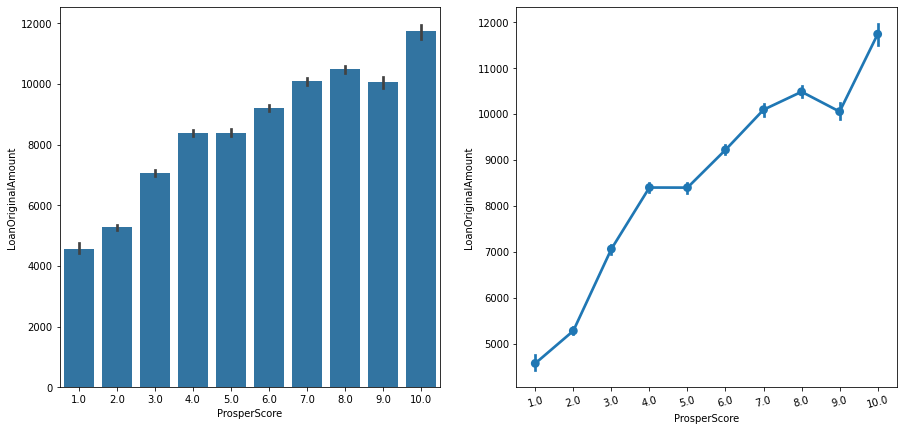

In [8]:
fig = plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sb.barplot(data = df, x = 'ProsperScore',y = 'LoanOriginalAmount',color = base_color);

plt.subplot(1,2,2)
sb.pointplot(data = df, x = 'ProsperScore',y = 'LoanOriginalAmount')
plt.xticks(rotation = 15);

Nothing unusual here, as we can see that the pattern follows a steady upward trend, indicating that the less risk involved, the higer the loan amount range one has access to. A slight dip in the 9th score and even less slight dip in the 5th score are slight quirks observed. 

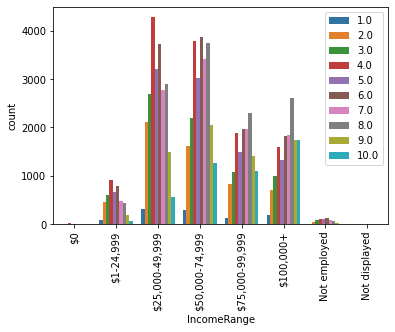

In [ ]:
sb.countplot(data = df, x = 'IncomeRange',hue = 'ProsperScore')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right');

The countplot doesn't follow a unique pattern showing that the prosper score isn't solely determined by the income range of the borrower. 

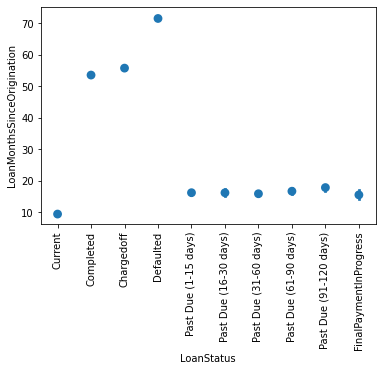

In [ ]:
sb.pointplot(data = df, x = 'LoanStatus',y = 'LoanMonthsSinceOrigination',linestyles = '')
plt.xticks(rotation = 90);

Apparently, customers whose loan existence is above 70 are more likely to default on their loan payment.

In [ ]:
#slice loans that are past their term. 
neg = df.query('Term < LoanMonthsSinceOrigination')

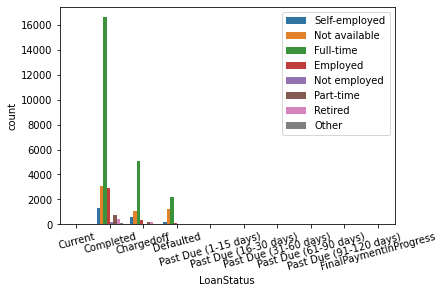

In [ ]:
sb.countplot(data = neg, x = 'LoanStatus', hue = 'EmploymentStatus')
plt.xticks(rotation = 15)
plt.legend(loc = 'upper right');

Most of the loans that are past their term have been paid back completely.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- From the heatmap plot of the loanstatus ànd employmebt status, we were able yo see that a larger precent of those employed in one form or the other were able to repay their debt, and even though some had a more than expected chargedoff rate, the percent of completed loans covers. In addition those unemployed and retired had the highest percentage of loans charged off. Those whose Employment status was not available had the highest rate of defaults on loan payments as well as a high rate of chargedoff loans.
- For the completed loan payments,the is a steady increase in the percentage of people that have paid off their debt as we move down the prosperScore. And although 34% of loan prospects with a ProsperScore of 1 have repaid the loan amount, it is offset by the 24% that have been chargedoff, which also as expected,is the highest percent for chargedofff loans. 
- A spotlight on the Defaulted and chargedoff variable from the pointplot for the loanStatus and debttoincomeratio, and saw that it confirmed the pattern observed in the univariate exploration of the DebtToIncomeRatio where there was a lesser count of loans given to customers with a hight debt to income ratio. Furthermore, I discovered that the average debtbto income ratio for those who defaulted or whose loans were chargedoff were the highest. The average for those who have repaid or are about to make final payment on their loan is far less, indicating that the debttoincomeratio variable is a strong indicator of whether or not a customer will default on a loan.
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- I detected an inconsistency in the data as the mean loan amount for borrowers that declared a $0$ income was surprisingly as high as 7000, further exploration showed that most of them were employed in one form or the other and led to the conclusion that they must have failed to indicate their income range which led to it being filled by yhe default range ($0$).Other than that, the pattern for the other categories followed the expected intuition that the mean loan amount would rise as the income bracket gets higher and fall for those that are not employed as they are less likely to repay the loan. 
- Also observed, was that the pattern for the pointplot for the ProsperScore and loanoriginalamount followed a steady upward trend, indicating that the less risk involved, the higer the loan amount range one has access to. A slight dip in the 9th score and evan more slight dip in the 5th score are slight quirks observed.

## Multivariate Exploration

> Create plots of three or more variables to investigate the data even
further.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


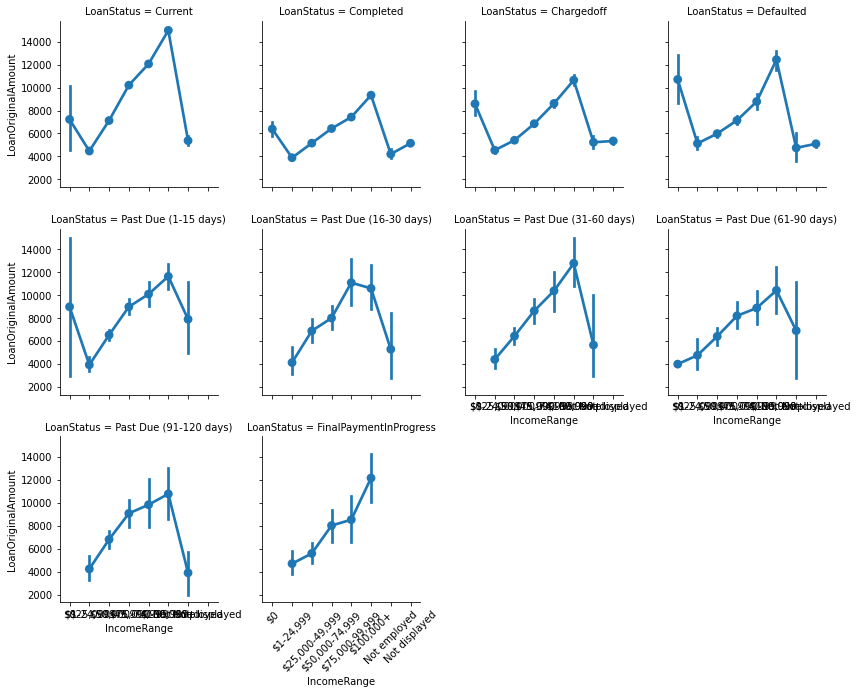

In [ ]:
g = sb.FacetGrid(data = df, col = "LoanStatus",col_wrap = 4)
g.map(sb.pointplot, 'IncomeRange','LoanOriginalAmount')
plt.xticks(rotation = 45);

The pattern follows through from the bivariate plot before, and we can see that the pattern remains consistent throughout the different loan statuses.A questionably high average loan amount for those with a zero dollar income which we presumed to be because of their failure to indicate an income range and the default of zero being put in, a steady rise in the average loan amount as income range rises and a fall for for those unemployed or with a not displayed status.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


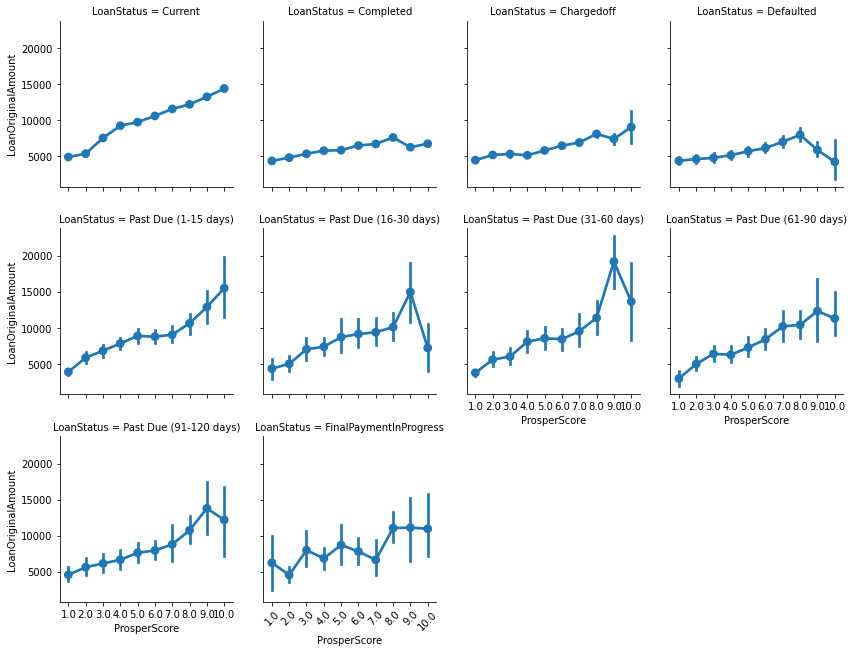

In [ ]:
g = sb.FacetGrid(data = df, col = 'LoanStatus',col_wrap = 4)
g.map(sb.pointplot,'ProsperScore','LoanOriginalAmount')
plt.xticks(rotation = 45);

The pattern shows a not too sharp upward trend except for the defaulted loan where we see a drop in the average loan amount for the prosperscore of 9 and 10. Which vould indicate that those with a prosperscore of 10 who defaulted, had relatively lower loan amounts. 

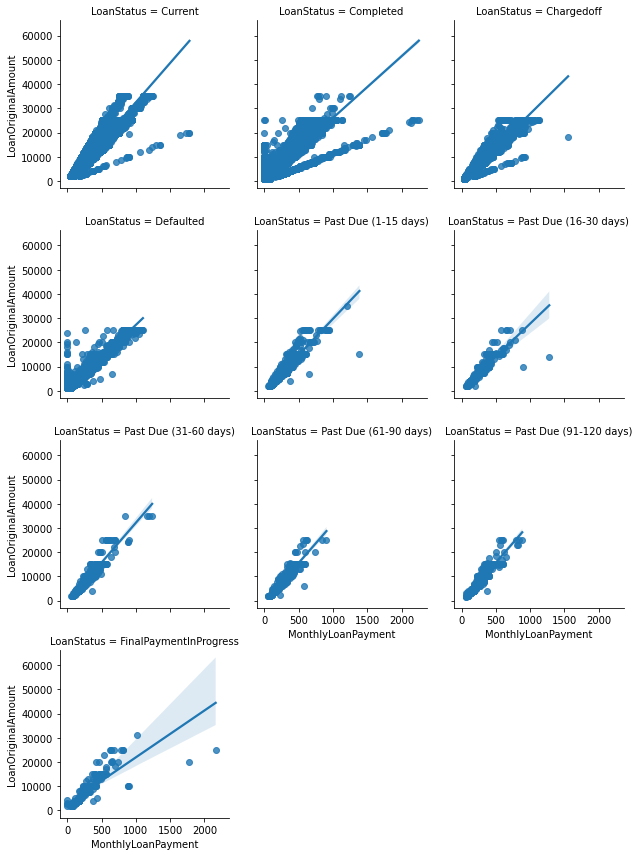

In [ ]:
g = sb.FacetGrid(data = df, col = "LoanStatus",col_wrap = 3)
g.map(sb.regplot, 'MonthlyLoanPayment','LoanOriginalAmount');

As expected the relationship across all loanstatus is consistent-a positive relationship between the loanoriginalamount and monthlyloanpayment-.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


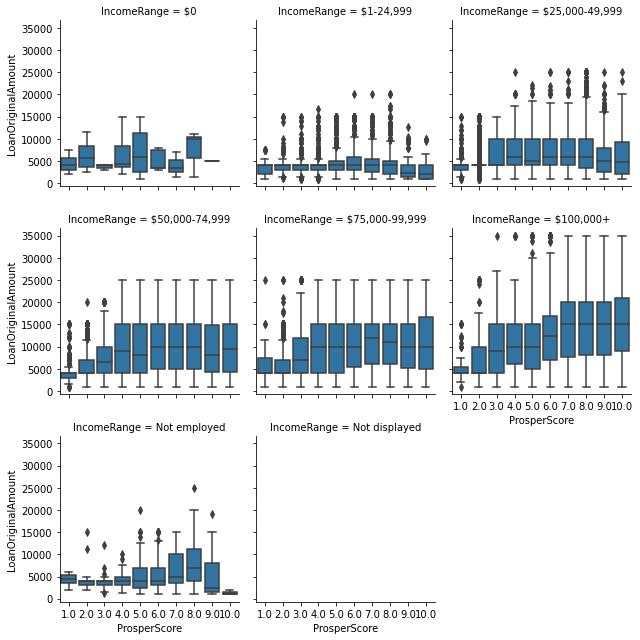

In [ ]:
g = sb.FacetGrid(data = df, col = 'IncomeRange',col_wrap = 3)
g.map(sb.boxplot,'ProsperScore','LoanOriginalAmount');

The focus will be on the $25000-49,999 and $100,0000+ income ranges where we see a distinct pattern. For the 25,0000 - 49,999, we see a near steady median up till 8th score and then a decline, indicating that most loans in this income bracket were given a low prosperscore and so the median loan amount for the lower prosperscores is higher than those observed on the higher scores. For the $100,000+, we see a near steady rise in the median loan amount up till 7th score where it flattens out, indicating that most loans in this income bracket were given a high prosperscore and so the mediaan loan amount for the higher prosperscoress is higher than those observed for the lower scores. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- For the pointplot showing the relationship between the loanoriginalamount and incomerange for each unique loanstatus, we see a pattern that follows through from the bivariate plot before, and we can see that the pattern remains consistent throughout the different loan statuses.A questionably high average loan amount for those with a zero dollar income which we presumed to be because of their failure to indicate an income range and the default of zero being put in, a steady rise in the average loan amount as income range rises and a fall for for those unemployed or with a not displayed status.

- For the pointplot showing the relationship between the loanoriginalamount and prosperscore for each unique loanstatus, the pattern shows a not too sharp upward trend except for the defaulted loan where we see a drop in the average loan amount for the prosperscore of 9 and 10. Which vould indicate that those with a prosperscore of 10 who defaulted, had relatively lower loan amounts.

- The relationship across all loanstatus is consistent.A positive relationship between the loanoriginalamount and monthlyloanpayment. 

- 
- The boxplot showing the relationship between the loanoriginalamount and prosperscore for each unique incomerange, the focus was on the  25000−49,999𝑎𝑛𝑑 100,0000+ income ranges where we see a distinct pattern. For the 25,0000 - 49,999, we see a near steady median up till 8th score and then a decline, indicating that most loans in this income bracket were given a low prosperscore and so the median loan amount for the lower prosperscores is higher than those observed on the higher scores. For the $100,000+, we see a near steady rise in the median loan amount up till 7th score where it flattens out, indicating that most loans in this income bracket were given a high prosperscore and so the mediaan loan amount for the higher prosperscoress is higher than those observed for the lower scores.
